# Projeto de Otimização de Estratégias Orientadas por Dados

### Bibliotecas para desenvolvimento do projeto

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import talib as ta
import quantstats as qs
import mplfinance as mpf
from backtesting import Backtest, Strategy
import gymnasium as gym
import gym_anytrading
import plotly

pip install -r requirements.txt

#### Escolher o Ticker e dar export à data

Para o desenvolvimento deste projeto vamos utilizar os assets da NVIDIA no período homólogo de 2019-2024. Ou seja, serão importados os dados de 1 de janeiro de 2019 até 31 de outubro de 2024, data em que se iniciou este projeto.

In [63]:
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-10-31"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [64]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1468 entries, 2019-01-02 to 2024-10-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1468 non-null   float64
 1   (Close, NVDA)      1468 non-null   float64
 2   (High, NVDA)       1468 non-null   float64
 3   (Low, NVDA)        1468 non-null   float64
 4   (Open, NVDA)       1468 non-null   float64
 5   (Volume, NVDA)     1468 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.3 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2019-01-02,3.378323,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.174215,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377579,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556391,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467852,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-10-24,140.410004,140.410004,141.350006,138.460007,140.820007,172354900
2024-10-25,141.539993,141.539993,144.130005,140.800003,140.929993,205122100


Após descarregarmos os dados no período indicado, verificamos que não há valores omissos nos 1468 dias/entradas do dataset. Vemos a existência de variavéis que correspondem a:

1. **Date**  
   - Representa a data da observação dos preços históricos (varia entre 01-01-2019 e 31-10-2024);

2. **Adj Close** (Adjusted Close)  
   - O preço ajustado de "fecho" da ação, considerando eventos como dividendos, splits e outras ações corporativas que afetam o valor da ação;

3. **Close**  
   - O preço de "fecho" da ação no final do dia, sem ajustes para eventos corporativos;

4. **High**  
   - O preço mais alto alcançado pela ação durante o dia;

5. **Low**  
   - O preço mais baixo alcançado pela ação durante o dia;

6. **Open**  
   - O preço inicial da ação no início do dia;

7. **Volume**  
   - O número total de ações negociadas durante o dia.

In [65]:
# transformar a data do indice 0para datetime e mostrar só até ao dia
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
data = data.reset_index()

In [66]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2019-01-02,3.378323,3.405500,3.462000,3.251250,3.266000,508752000
1,2019-01-03,3.174215,3.199750,3.379000,3.192250,3.344750,705552000
2,2019-01-04,3.377579,3.404750,3.443250,3.242500,3.273500,585620000
3,2019-01-07,3.556391,3.585000,3.622250,3.410750,3.462500,709160000
4,2019-01-08,3.467852,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
1463,2024-10-24,140.410004,140.410004,141.350006,138.460007,140.820007,172354900
1464,2024-10-25,141.539993,141.539993,144.130005,140.800003,140.929993,205122100
1465,2024-10-28,140.520004,140.520004,143.139999,140.050003,143.000000,173586700


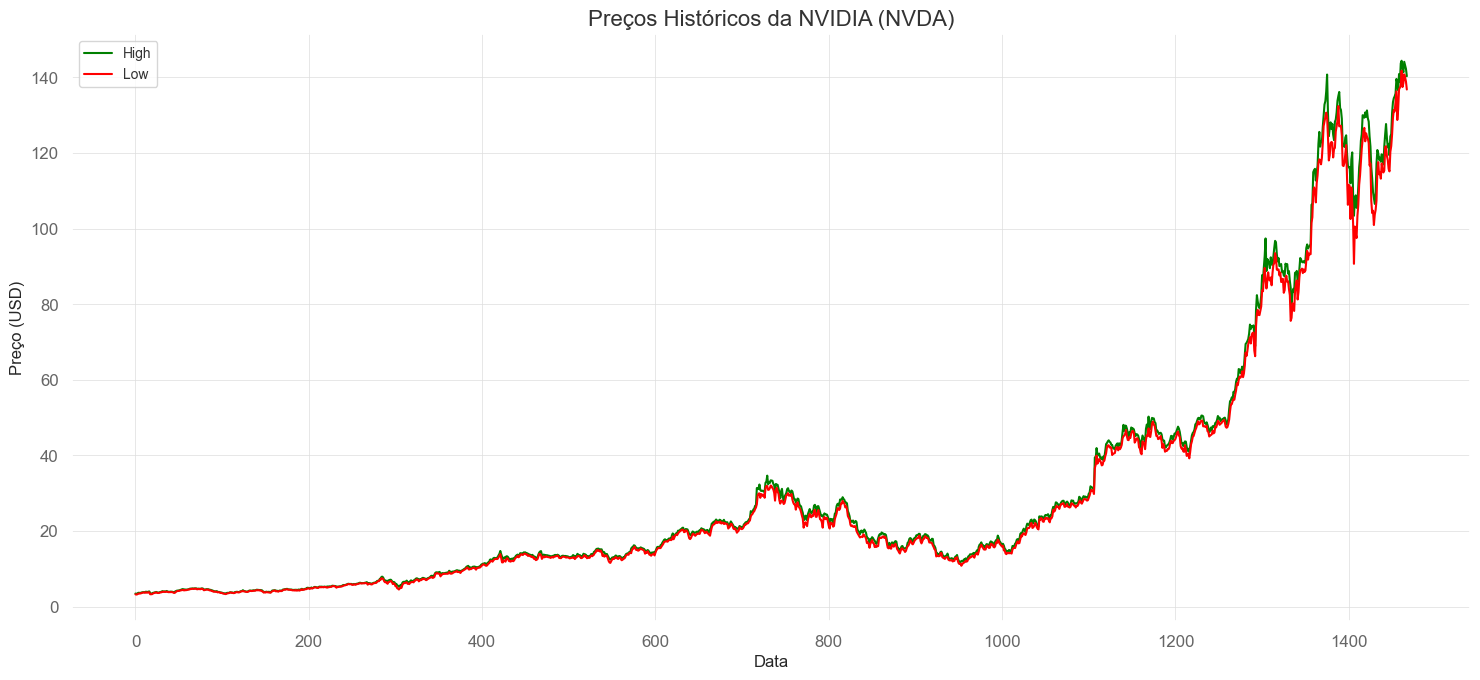

In [68]:
plt.figure(figsize=(15, 7))

# Plotar variáveis de preço no mesmo gráfico
# plt.plot(data.index, data['Adj Close'], label="Adj Close", color='blue')
# plt.plot(data.index, data['Close'], label="Close", color='orange')
plt.plot(data.index, data['High'], label="High", color='green')
plt.plot(data.index, data['Low'], label="Low", color='red')
# plt.plot(data.index, data['Open'], label="Open", color='purple')

plt.title("Preços Históricos da NVIDIA (NVDA)", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.legend(loc='upper left', fontsize=10)


# Exibir gráfico
plt.tight_layout()
plt.show()

In [ ]:
# TODO: ver este gráfico melhor

import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [18]:
returns = data["Adj Close"].pct_change() # TODO: mudar o intervalo de datas para não ter omissos maybe
returns

Ticker,NVDA
Date,
2019-01-02,NaN
2019-01-03,-0.060417
2019-01-04,0.064068
2019-01-07,0.052941
2019-01-08,-0.024896
...,...
2024-10-24,0.006091
2024-10-25,0.008048
2024-10-28,-0.007206


In [19]:
# daily risk free rate
rf = (1.02 ** (1/360))-1
# Calculate volatilities , expected returns and sharpe ratios.
volatility = returns.std() # volatility
exp_returns = returns.mean () # expected returns
sr = (exp_returns-rf)/volatility # Sharpe ratio

print(f"O retorno esperado é de: {exp_returns}")
print(f"O risco é de: {volatility}")
print(f"O Sharpe ratio é de: {sr}")

O retorno esperado é de: Ticker
NVDA    0.003076
dtype: float64
O risco é de: Ticker
NVDA    0.032913
dtype: float64
O Sharpe ratio é de: Ticker
NVDA    0.091787
dtype: float64


| Métrica               | Fórmula                           | Valor          | Explicação                                                                                 |
|-----------------------|------------------------------------|----------------|-------------------------------------------------------------------------------------------|
| **Taxa Livre de Risco (rf)** | $rf = (1 + 0.02)^{1/360} - 1$ | `0.000055567` | Taxa de retorno diário sem risco, assumindo uma taxa anual de 2% e ajustada para 360 dias úteis. |
| **Volatilidade**       | $\sigma = \text{std}(\text{returns})$ | `x.xxx`        | O desvio padrão dos retornos diários, indicando a variabilidade ou risco do ativo.       |
| **Retorno Esperado**   | $\mu = \text{mean}(\text{returns})$ | `x.xxx`        | A média dos retornos diários, representando o retorno esperado do ativo.                |
| **Sharpe Ratio (sr)**  | $SR = \frac{\mu - rf}{\sigma}$ | `x.xxx`        | Medida de retorno ajustado ao risco, calculada como o excesso de retorno dividido pela volatilidade. |


In [21]:
# define function that compute CAGR
def cagr(start_value , end_value , num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
# example
start_value = float(data["Adj Close"].iloc[0])
end_value = float(data["Adj Close"].iloc[-1])
num_periods = len(data["Adj Close"])
result = cagr(start_value , end_value , num_periods)
print(result)

0.0025386891810836865


C:\Users\jfbot\AppData\Local\Temp\ipykernel_19400\1881102419.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_value = float(data["Adj Close"].iloc[0])
C:\Users\jfbot\AppData\Local\Temp\ipykernel_19400\1881102419.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_value = float(data["Adj Close"].iloc[-1])


## Estratégia Estatística de Trading 